## Deep Autoencoder

In [28]:
import os
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import glob
import cv2 as cv
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model


## Using resized images

In [29]:
import glob
import cv2 as cv

path = glob.glob("E:/alaki/resized/roof_images/*.jpg")
resized_images = []
for img in path:
    n = cv.imread(img)
    resized_images.append(n)

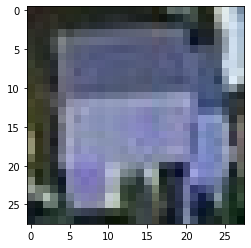

In [30]:
plt.imshow(resized_images[1000])

In [31]:
input_img = Input(shape=(2352,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(2352, activation='sigmoid')(decoded)

In [32]:
import numpy as np
resized_images=np.array(resized_images)


In [33]:
x_train, x_test = train_test_split(resized_images, test_size=0.30)

In [34]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


In [35]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)


(29931, 2352)
(12828, 2352)


In [37]:
input_img = Input(shape=(2352,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(2352, activation='sigmoid')(decoded)

In [38]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 29931 samples, validate on 12828 samples
Epoch 1/50
29931/29931 [==============================] - 8s 261us/step - loss: 0.0529 - val_loss: 0.0526
Epoch 2/50
29931/29931 [==============================] - 7s 250us/step - loss: 0.0528 - val_loss: 0.0525
Epoch 3/50
29931/29931 [==============================] - 9s 297us/step - loss: 0.0527 - val_loss: 0.0523
Epoch 4/50
29931/29931 [==============================] - 7s 241us/step - loss: 0.0525 - val_loss: 0.0521
Epoch 5/50
29931/29931 [==============================] - 8s 266us/step - loss: 0.0519 - val_loss: 0.0512
Epoch 6/50
29931/29931 [==============================] - 6s 206us/step - loss: 0.0505 - val_loss: 0.0490
Epoch 7/50
29931/29931 [==============================] - 7s 236us/step - loss: 0.0477 - val_loss: 0.0462
Epoch 8/50
29931/29931 [==============================] - 6s 217us/step - loss: 0.0454 - val_loss: 0.0444
Epoch 9/50
29931/29931 [==============================] - 6s 200us/step - loss: 0.0440 - val_loss: 0.0

In [40]:
decoded_imgs = autoencoder.predict(x_test)

<function matplotlib.pyplot.show(*args, **kw)>

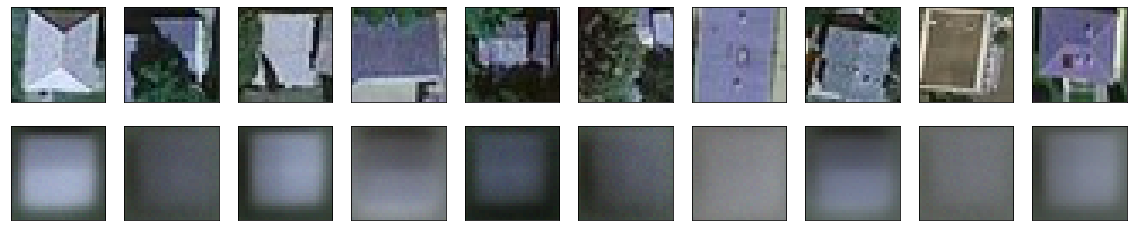

In [41]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show